In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from eda_utils import plotar_estacoes_mapa

In [ ]:
bronze_conn = duckdb.connect("bronze_db")
prata_conn = duckdb.connect("prata_db")
ouro_conn = duckdb.connect("ouro_db")
modelling_conn = duckdb.connect("modelling_db")

# Descrição das Estações

In [4]:
dim_estacoes = ouro_conn.execute("SELECT * FROM dim_estacoes").fetch_df()
print("RESUMO DAS ESTAÇÕES DE CADA INSTITUIÇÃO")
for instituicao in dim_estacoes['nm_instituicao'].unique():
    df = dim_estacoes.loc[dim_estacoes['nm_instituicao']==instituicao]
    print(f"Instituição: {instituicao}")
    print(f"Total de estações: {df['id_estacao'].nunique()}")
    print(f"Tipos de estação:")
    print(f" > Estações Meteorológicas: {df.loc[df['nm_tipo_estacao']=='Meteorológica','id_estacao'].nunique()}")
    print(f" > Estações Indefinidas: {df.loc[df['nm_tipo_estacao']=='Indefinido','id_estacao'].nunique()}")
    print(f"Subtipos de estação:")
    print(f" > Estações Automáticas: {df.loc[df['nm_subtipo_estacao']=='Automática','id_estacao'].nunique()}")
    print(f" > Estações Convencionais: {df.loc[df['nm_subtipo_estacao']=='Convencional','id_estacao'].nunique()}")
    print(f" > Estações Indefinidas: {df.loc[df['nm_subtipo_estacao']=='Indefinido','id_estacao'].nunique()}")
    print()

RESUMO DAS ESTAÇÕES DE CADA INSTITUIÇÃO
Instituição: Agência Nacional de Águas
Total de estações: 2260
Tipos de estação:
 > Estações Meteorológicas: 0
 > Estações Indefinidas: 2260
Subtipos de estação:
 > Estações Automáticas: 0
 > Estações Convencionais: 0
 > Estações Indefinidas: 2260

Instituição: Centro Nacional de Monitoramento e Alertas de Desastres Naturais
Total de estações: 1619
Tipos de estação:
 > Estações Meteorológicas: 0
 > Estações Indefinidas: 1619
Subtipos de estação:
 > Estações Automáticas: 0
 > Estações Convencionais: 0
 > Estações Indefinidas: 1619

Instituição: Sistema Alerta Rio
Total de estações: 33
Tipos de estação:
 > Estações Meteorológicas: 0
 > Estações Indefinidas: 33
Subtipos de estação:
 > Estações Automáticas: 0
 > Estações Convencionais: 0
 > Estações Indefinidas: 33

Instituição: Fazenda Paineiras (Instituição Particular Goiás)
Total de estações: 13
Tipos de estação:
 > Estações Meteorológicas: 13
 > Estações Indefinidas: 0
Subtipos de estação:
 > Est

In [10]:
dim_estacoes['nm_variavel'].unique()

array(['precipitacao', 'temperaturaarminima', 'temperaturaarmaxima',
       'temperaturaarmedia', 'umidaderelativaminima',
       'umidaderelativamedia', 'pressaoatmosfericamedia',
       'umidaderelativamaxima', 'pressaoatmosfericamaxima',
       'pressaoatmosfericaminima', 'evapotranspiracaopotencial',
       'radiacaosolarreal', 'velocidadeventomedio2m', 'pontoorvalhomedio',
       'velocidadeventomaximo2m', 'pontoorvalhominimo',
       'pontoorvalhomaximo', 'velocidadeventomedio10m', 'insolacaoreal',
       'evaporimetropiche', 'horarioventomaximo2m',
       'direcaoventomaximo2m'], dtype=object)

c:\Users\Mateus Santos Rochas\Desktop\Estudos\07. Doutorado - Matemática aplicada\Pesquisa\Dados Novos\eda_utils.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


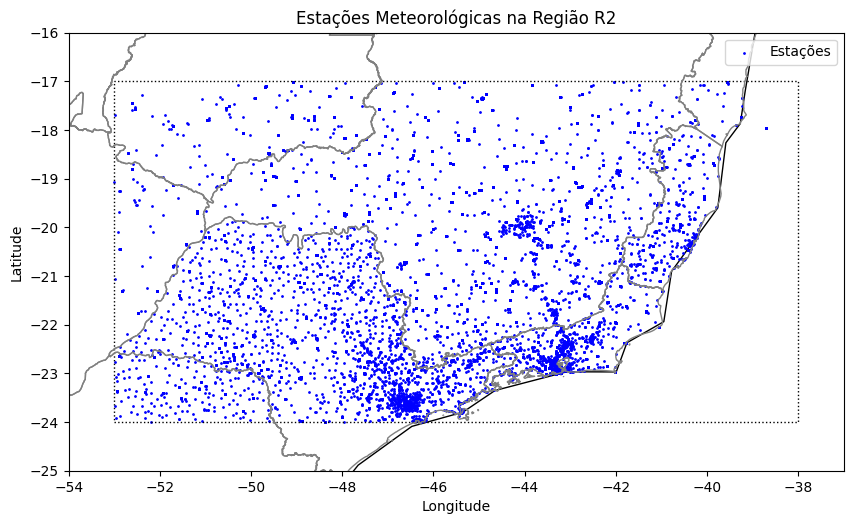

In [4]:
plotar_estacoes_mapa(dim_estacoes,markersize=1,markercolor='blue')

# Estações vizinhas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from eda_utils import plot_distance_correlation,plot_distance_correlation_english

bronze_conn = duckdb.connect("bronze_db")
prata_conn = duckdb.connect("prata_db")
ouro_conn = duckdb.connect("ouro_db")
modelling_conn = duckdb.connect("modelling_db")

In [2]:
fato_estacoes_fila_P_1 = modelling_conn.execute("SELECT * FROM fato_estacoes_fila_P_1 WHERE P_1_Rank = 1").fetch_df()

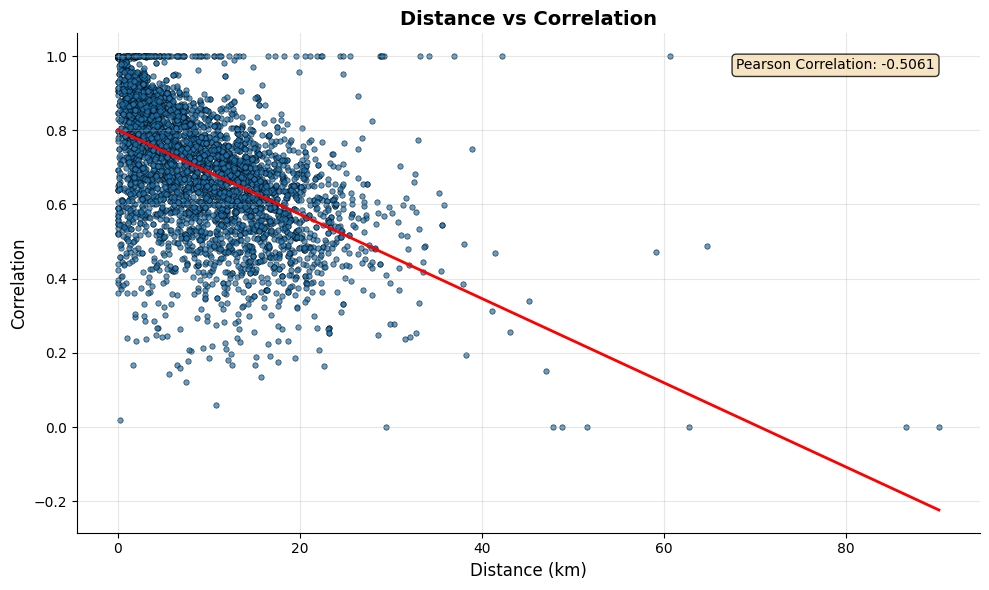

In [4]:
df = fato_estacoes_fila_P_1.loc[(fato_estacoes_fila_P_1['vl_distancia_km']<=100)]

fig, ax = plot_distance_correlation_english(df, s=15, alpha=0.7,figsize=(10,6))

In [10]:
abt_estacoes_vizinhas = modelling_conn.execute("SELECT * FROM abt_estacoes_vizinhas").fetch_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [14]:
with pd.option_context('display.max_columns', None):
    display(abt_estacoes_vizinhas.head())

,id_estacao,latitude,longitude,vl_declividade,vl_altitude,vl_distancia_oceano,vl_aspecto_relevo,dt_medicao,vl_precipitacao,vl_temperatura_maxima,vl_temperatura_media,vl_temperatura_minima,vl_umidade_relativa_maxima,vl_umidade_relativa_media,vl_umidade_relativa_minima,vl_velocidade_vento_2m_maxima,vl_velocidade_vento_2m_media,vl_velocidade_vento_10m_media,vl_precipitacao_chirps,vl_precipitacao_cpc,vl_temperatura_maxima_cpc,vl_temperatura_minima_cpc,vl_precipitacao_gpm_final_run,vl_precipitacao_gpm_late_run,vl_precipitacao_power,vl_temperatura_maxima_2m_K_power,vl_temperatura_media_2m_K_power,vl_temperatura_minima_2m_K_power,vl_umidade_relativa_2m_power,vl_pressao_nivel_superficie_power,vl_irradiancia_allsky_power,vl_direcao_vento_10m_power,vl_direcao_vento_2m_power,vl_temperatura_orvalho_2m_K_power,vl_vento_10m_power,vl_vento_medio_2m_power,vl_vento_maximo_2m_power,vl_vento_maximo_10m_power,vl_precipitacao_vizinha,vl_correlacao_vizinha,pct_intersecao_precipitacao_vizinha,vl_distancia_km_vizinha,estacao_vizinha_escolhida,vl_prioridade_vizinha
0,923901,-21.4333,-47.3333,1.74,595.0,287.12,247.83,2005-11-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030000,28.230000,18.070000,NaN,1.0,0.095330,304.812500,296.520312,290.060938,67.7250,92257.8375,263.656250,144.0500,146.3000,289.339063,2.915625,1.693750,2.654688,4.646875,0.0,0.578020,97.120951,7.50,1.0,0.5527
1,921373,-19.4158,-41.7297,12.38,420.0,165.79,299.42,2011-01-20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,34.090000,20.500000,NaN,0.0,0.000000,302.593750,297.098437,292.142187,81.1875,96363.3125,331.179688,50.5250,50.5250,293.362500,2.587500,1.656250,2.660938,3.617188,0.0,0.588478,93.812803,24.77,1.0,0.3532
2,922797,-20.8500,-48.8500,3.47,534.0,419.54,3.95,2000-11-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.050000,9.420000,9.420000,NaN,154.0,5.661694,299.948438,296.207812,292.973437,82.1875,94960.0250,304.550781,105.2875,105.3625,292.831250,1.726562,1.028125,2.393750,3.289062,0.0,0.817498,100.000000,5.56,1.0,0.8123
3,922073,-20.2964,-40.9339,8.77,815.0,57.84,274.84,2016-07-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740000,19.420000,13.590000,NaN,0.0,1.893974,295.817187,292.490625,290.401563,84.1375,98449.3000,82.531250,100.1875,100.1375,289.581250,4.098438,3.068750,3.995312,5.370312,0.0,0.657976,98.972564,15.33,1.0,0.5746
4,926460,-22.8981,-51.8881,1.03,498.0,421.43,100.01,2005-09-12,27.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.389999,19.469999,17.889999,NaN,210.0,15.045047,293.956250,290.807813,288.521875,83.5750,96798.0750,33.007812,240.8750,241.1250,287.859375,3.442188,2.228125,3.157812,4.845313,36.2,0.597978,98.415996,13.40,1.0,0.5404
